
# Proyecto
### Erick Fernando López Fimbres.  
#### erick.lopez.fimbres@gmail.com

## Limpieza

Para poder utilizar las tecnicas apropiadas de procesamiento del lenguaje natural, primero debemos de limpiar los datos que estan en el archivo bajado de wikipedia, en nuestro caso se llama **"todas_las_enfermedades.xml"**, el cual esta situado en la carpeta **datos** de este proyecto.

Está es una de las etapas más importantes, puesto que para poder obtener resultados debemos darle un tratamiento a los datos, al rededor del 80% del tiempo es invertido en esta etapa.

Nuestro primer paso será la elaboración de un **lexicón** el cual se define como **conjunto de lexemas en un contexto determinado** en nuestro caso será construir un lexicon específico para el contexto de enfermedades. 




## Lexicón

La idea básica en la construcción de un lexicón es optimizar la cantidad de términos en nuestro diccionario: muchas palabras permiten reconocer muchas características en un texto, pero representan un alto costo computacional; pocos términos en el lexicón es computacionalmente manejable, pero carece de capacidad para reconocer las características de un texto. Entonces el lexicón ideal es una combinación entre ambas el cual nos permite obtener características con un número de palabras no muy elevado pero tampoco demaciado reducido.

A continuación procederemos a crear nuestro lexicón con el archivo **"todas_las_enfermedades.xml"** bajado de wikipedia.

### Estructura de los datos

Primero procederemos a analizar la estructura de los datos del archivo que nos genera wikipedia, para así poder procesar los datos y limpiarlos.

In [39]:
import xml.etree.ElementTree as ET
#tree = ET.parse("datos/Enfermedades_geneticas.xml")
tree = ET.parse("datos/todas_las_enfermedades.xml")
root = tree.getroot()

print(root.tag, root.text)
for row, child in zip(range(3), root):
    print("1 ", child.tag, child.attrib)
    for grandchild in child:
        print("2   ", grandchild.tag, grandchild.attrib)
        for grand2child in grandchild:
            print("3     ", grand2child.tag, grand2child.attrib)
    print()

{http://www.mediawiki.org/xml/export-0.10/}mediawiki 
  
1  {http://www.mediawiki.org/xml/export-0.10/}siteinfo {}
2    {http://www.mediawiki.org/xml/export-0.10/}sitename {}
2    {http://www.mediawiki.org/xml/export-0.10/}dbname {}
2    {http://www.mediawiki.org/xml/export-0.10/}base {}
2    {http://www.mediawiki.org/xml/export-0.10/}generator {}
2    {http://www.mediawiki.org/xml/export-0.10/}case {}
2    {http://www.mediawiki.org/xml/export-0.10/}namespaces {}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '-2', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '-1', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '0', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '1', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '2', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0

Marcamos como 1, 2 y 3 los niveles descendientes del nodo raíz y posteriores. Una exploración detallada muestra que los nodos que nos interesan son los que marcamos a continuación:

![](imagenes/interes_export.png)



Analizando a detalle los elementos del nivel 1

In [40]:
for index, child in zip(range(len(root)), root):
    if(child.tag.find("page") < 0):
        print(index, child.tag)

0 {http://www.mediawiki.org/xml/export-0.10/}siteinfo


El unico nodo que no nos interesa a este nivel es root[0]

In [41]:
#Descartamos el primer hijo y analizamos el segundo
child = root[1]
for grandchild in child:
    if(grandchild.tag.find("title") >= 0):
        title = grandchild.text
        print(title)
    if(grandchild.tag.find("revision") >= 0): 
        for grand2child in grandchild:
            if(grand2child.tag.find("text") >= 0):
                text = grand2child.text
                print(text)

Infantilismo
[[Archivo:Windelfetischist.jpg|miniaturadeimagen|Un con infantilismo al tener el [[fetichismo del pañal]].]]
El '''infantilismo''' es una enfermedad en la que persisten en el [[adulto]] diversas características [[anatomía|anatómicas]], [[fisiología|fisiológicas]] y [[psicología|psicológicas]] de la [[infancia]]; se reconocen 4 tipos:

* Infantilismo psicosexual: El "infantilismo psíquico" consiste, según Hirschfeld, en la conservación del "modo de ser mental" de un niño. Se notaría "cierta parentela con grados ligeros de debilidad mental". [[Hirschfeld]] considera también como variante psíquica del infantilismo el "[[cisvestismo]]", a saber, el uso de vestidos de niño en edad adulta.

* Infantilismo de [[Brissaud]]: Un desorden congénito causado por una disminución de las [[hormona]]s [[glándulas tiroides|tiroideas]] durante el desarrollo [[feto|fetal]] o durante los primeros años de la vida. Se caracteriza por [[cretinismo]] y [[retraso mental]].

* Infantilismo de [[Lora

Ahora limpiaremos el texto:

In [42]:
from bs4 import BeautifulSoup
import re

child = root[1]
for grandchild in child:
    if(grandchild.tag.find("title") >= 0):
        title = grandchild.text
        print(title)
    if(grandchild.tag.find("revision") >= 0): 
        for grand2child in grandchild:
            if(grand2child.tag.find("text") >= 0):
                #Obtener el texto del nodo
                text = grand2child.text.lower()
                #Eliminar las cadenas que inician en {{ seguidas de 
                #cualquier cosa excepto }} y terminadas con }}
                
                #text = re.sub('{{[^}}]*}}', '', text)
                
                text = re.sub('{{[^}}{{]*}}', '', text)
                text = re.sub('{{[^}}{{]*}}', '', text)
                
                #text = re.sub('["jpg"]', '', text)
                
                #Misma idea, pero con el caracter especial \[ \] y Category:
                text = re.sub('\[\[Category:[^\]\]]*\]\]', '', text)
                #... y entre === ===
                text = re.sub('={3}[\w]+={3}', '', text)
                #... y entre == ==
                text = re.sub('={2}[\w]+={2}', '', text)
                #Extrae el texto de entre el código html... casi
                text = BeautifulSoup(text, "lxml").get_text()
                text = re.sub("<img([\w\W]+?)/?>", "", text)
                #Eliminar direcciones http
                text = re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', text) 
                #... y direcciones de correo
                text = re.sub('[\w\.-]+@[\w\.-]+', " ", text)
                #... y direcciones wikt*
                text = re.sub('\[\[wikt[^|]*|', '', text)
                #Eliminar puntos decorativos como en S.H.I.E.L.D.
                text = text.replace(".","")
                #elimina las listas que aparecen así: 
                # * algo
                # * otra cosa
                text = text.replace("*","")             
                
                words = text.split()
                #Reenplazar el usos de apostrofos
                texto = [word for word in words]
                texto = " ".join(texto)
                #Eliminar otros caracteres no alfabéticos
                texto = re.sub("[^\w*]", " ", texto)
                texto = re.sub("[\d]", " ", texto)
                #Eliminar palabras repetidas consecutivas
                words = re.sub(r'\b(\w+)(\s+\1\b)+', r'\1', texto).split()
                texto = " ".join(words)
                
                print(texto)

Infantilismo
archivo windelfetischistjpg miniaturadeimagen un con infantilismo al tener el fetichismo del pañal el infantilismo es una enfermedad en la que persisten en el adulto diversas características anatomía anatómicas fisiología fisiológicas y psicología psicológicas de la infancia se reconocen tipos infantilismo psicosexual el infantilismo psíquico consiste según hirschfeld en la conservación del modo de ser mental de un niño se notaría cierta parentela con grados ligeros de debilidad mental hirschfeld considera también como variante psíquica del infantilismo el cisvestismo a saber el uso de vestidos de niño en edad adulta infantilismo de brissaud un desorden congénito causado por una disminución de las hormona s glándulas tiroides tiroideas durante el desarrollo feto fetal o durante los primeros años de la vida se caracteriza por cretinismo y retraso mental infantilismo de lorain un tipo de enanismo debida a una deficiencia de la secreción de la hormona del crecimiento y de la 

Una vez lo mas limpio el documento procederemos, con la limpieza, procesando todo el archivo xml y crearemos un objeto Dataframe

In [43]:
import os
from IPython.display import display
import pandas as pd
# Modificar la longitud de caracteres en una celda que se imprimirán 
pd.options.display.max_colwidth = 150 
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords #palabras vacias 

#nltk.download() #descomenta esta linea si no tienes nltk
#tienes que descargar la libreria nltk para poder utilizarla

nombre  \
0           Infantilismo   
1       Pectus excavatum   
2       Pectus carinatum   
3             Onfalocele   
4  Período prepatogénico   

                                                                                                                                             descripcion  \
0  archivo windelfetischistjpg miniaturadeimagen un con infantilismo al tener el fetichismo del pañal el infantilismo es una enfermedad en la que per...   
1  el pectus excavatum es una deformidad congénita de la caja torácica caracterizada por pecho hundido en la región del esternón la probabilidad del ...   
2  el pectus carinatum es una deformidad de la caja torácica en la que el pecho protruye en quilla ave quilla de barco es menos frecuente que el pect...   
3  la onfalocele u onfalocele infantil también llamado exonfalocele se da en el momento en el que el embrión presenta las vísceras de la región abdom...   
4  el período prepatogénico precede a las manifestaciones clínica s y está conformado por las condiciones del huésped el agente y el medio ambiente e...   

                                                                                                                                        palabras_comunes  
0  [archivo, windelfetischistjpg, miniaturadeimagen, infantilismo, tener, fetichismo, pañal, infantilismo, enfermedad, persisten, adulto, diversas, c...  
1  [pectus, excavatum, deformidad, congénita, caja, torácica, caracterizada, pecho, hundido, región, esternón, probabilidad, pectus, excavatum, depen...  
2  [pectus, carinatum, deformidad, caja, torácica, pecho, protruye, quilla, ave, quilla, barco, menos, frecuente, pectus, excavatum, repercusiones, f...  
3  [onfalocele, u, onfalocele, infantil, llamado, exonfalocele, da, momento, embrión, presenta, vísceras, región, abdominal, cuerpo, aunque, casi, si...  
4  [período, prepatogénico, precede, manifestaciones, clínica, s, conformado, condiciones, huésped, agente, medio, ambiente, período, aparición, mani...

Cantidad de palabras en el corpus:  856867
Cantidad de palabras diferentes:  67504
Palabras utilizadas una vez:  32385

Palabras más populares:
 [('enfermedad', 6814), ('puede', 5291), ('síndrome', 5036), ('categoría', 4691), ('s', 4614), ('enfermedades', 4241), ('tratamiento', 3760), ('pueden', 3416), ('ser', 3412), ('síntomas', 3407), ('pacientes', 3090), ('casos', 2966), ('cáncer', 2891), ('diagnóstico', 2432), ('of', 2291), ('si', 2220), ('años', 1988), ('tipo', 1967), ('células', 1766), ('forma', 1713), ('and', 1612), ('personas', 1601), ('paciente', 1548), ('dos', 1469), ('aunque', 1455), ('niños', 1434), ('gen', 1430), ('riesgo', 1419), ('the', 1369), ('causa', 1341), ('dolor', 1301), ('mayor', 1291), ('desarrollo', 1268), ('referencias', 1262), ('caso', 1241), ('sistema', 1213), ('parte', 1212), ('debido', 1196), ('cada', 1177), ('virus', 1171), ('después', 1140), ('in', 1130), ('vida', 1126), ('infección', 1105), ('trastornos', 1105), ('edad', 1099), ('debe', 1099), ('general'

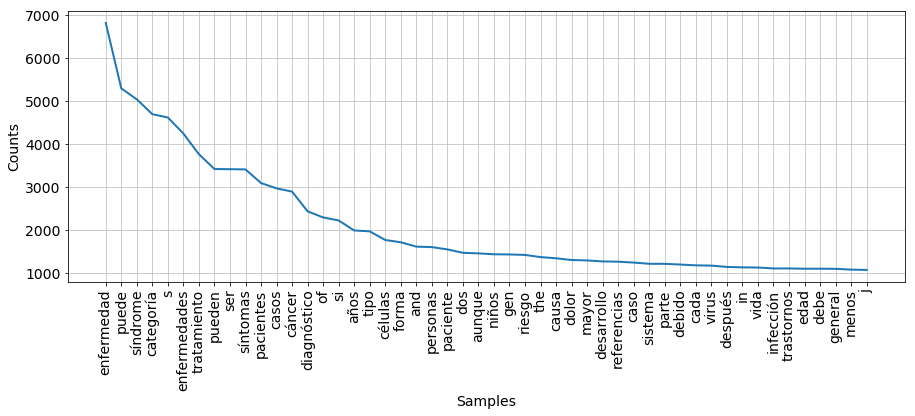

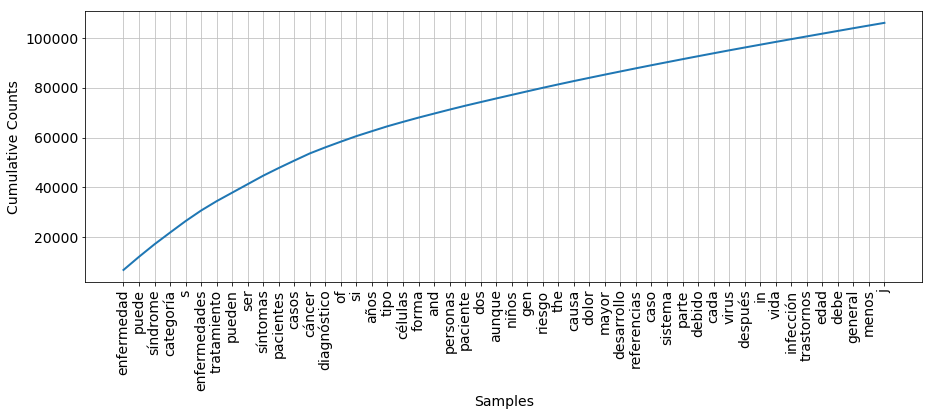

In [44]:
enfermedadesDf = pd.DataFrame(columns=["nombre", "descripcion"])

index = 0
for child in root:
    if(child.tag.find("page") >=0 ):
        for grandchild in child:
            if(grandchild.tag.find("title") >= 0):
                  title = grandchild.text
            if(grandchild.tag.find("revision") >= 0): 
                for grand2child in grandchild:
                    if(grand2child.tag.find("text") >= 0):
                        #Obtener el texto del nodo
                        text = grand2child.text.lower()
                        #Eliminar las cadenas que inician en {{ seguidas de 
                        #cualquier cosa excepto }} y terminadas con }}
                        
                        #llaves dentro de llaves
                        text = re.sub('{{[^}}{{]*}}', '', text)
                        text = re.sub('{{[^}}{{]*}}', '', text)
                
                        #Misma idea, pero con el caracter especial \[ \] y Category:
                        text = re.sub('\[\[Category:[^\]\]]*\]\]', '', text)
                        #... y entre === ===
                        text = re.sub('={3}[\w]+={3}', '', text)
                        #... y entre == ==
                        text = re.sub('={2}[\w]+={2}', '', text)
                        #Extrae el texto de entre el código html... casi
                        text = BeautifulSoup(text, "lxml").get_text() 
                        text = re.sub("<img([\w\W]+?)/?>", "", text)
                        #Eliminar direcciones http
                        text = re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', text) 
                        #... y direcciones de correo
                        text = re.sub('[\w\.-]+@[\w\.-]+', " ", text)
                        #... y direcciones wikt*
                        text = re.sub('\[\[wikt[^|]*|', '', text)
                        #Eliminar puntos decorativos como en S.H.I.E.L.D.
                        text = text.replace(".","")
                        #elimina las listas que aparecen así: 
                        # * algo
                        # * otra cosa
                        text = text.replace("*","")             
                
                        words = text.split()
                        texto = [word for word in words]
                        texto = " ".join(texto)
                        #Eliminar otros caracteres no alfabéticos
                        texto = re.sub("[^\w*]", " ", texto)
                        texto = re.sub("[\d]", " ", texto)
                        #Eliminar palabras repetidas consecutivas
                        words = re.sub(r'\b(\w+)(\s+\1\b)+', r'\1', texto).split()
                        texto = " ".join(words)
        enfermedadesDf.loc[index] = [title, texto]
        index = index + 1
        
#Guardar La base de datos para posteriores usos
enfermedadesDf.to_json("datos/enfermedades.json", orient='records') 
stops = set(stopwords.words("spanish"))
enfermedadesDf["palabras_comunes"] = list(map(lambda row: [w for w in row.split() if not w in stops 
                                              and len(w)>0], enfermedadesDf.descripcion))

display(enfermedadesDf.head())

all_words = []
for row in enfermedadesDf.palabras_comunes:
    all_words.extend(row)
most_common_words = nltk.FreqDist(all_words)

print("Cantidad de palabras en el corpus: ", most_common_words.N())
numWords = len(most_common_words.most_common())
print("Cantidad de palabras diferentes: ", numWords)
uselessWords = most_common_words.hapaxes()
print("Palabras utilizadas una vez: ", most_common_words.Nr(1))
print("\nPalabras más populares:\n", most_common_words.most_common(50))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=False)
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=True)

Este codigo nos generara un archivo **.json** al que llamamos **enfermedades** el cual contiene las palabras un poco mas limpias para poder trabajar con ellas, entonces para saber si una palabra es importante o no tenemos que tener en cuenta su **TF-IDF**.

## TF-IDF

[**TF-IDF**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) (term frequency–inverse document frequency) es una medida de la importancia discriminante de una palabra en un documento perteneciente a un corpus. Esta cantidad se forma por dos componentes:

1 **TF** (frecuencia del término), describe qué tanto se emplea un término en un documento. La lógica de este componente es que mientras más veces aparece un término en un documento, más representativo es del mismo. Existen diversa maneras de calcular este valor, siendo la más simple el conteo directo del término en el documento. La mayoría de las opciones, sin embargo, utilizan alguna variante basada en la frecuencia relativa del término en el documento.

$$
tf(t, d) = \frac{\textrm{Número de veces que aparece el término }t\textrm{ en el documento }d}
{\textrm{Número de términos en el documento }d} 
$$

2 **IDF** (frecuencia inversa del documento), representa la frecuencia con que es empleado el término en el corpus. Un término que es utilizado con mucha frecuencia en el contexto, es poco discriminante. La forma básica de calcular esta cantidad es como el inverso de la frecuencia de documentos en que aparece el término (escalado logarítmicamente). 

$$
idf(t, D) = \log\frac{\textrm{Número de documentos en el corpus }D}
{\textrm{Número de documentos en el corpus }D\textrm{ donde aparece el término t}} 
$$

El valor de TF para un término/palabra es específico para cada documento, mientras que IDF es un valor global del término en el corpus. El valor de TF-IDF se obtiene multiplicando los valores de TF e IDF:

$$
tfidf(t, d, D) = tf(t, d)\cdot idf(t, D)
$$

Durante la construcción de un lexicón podemos emplear estas ideas para depurar, de forma automática, el conjunto de palabras. Analicemos las estadísticas de las palabras depuradas, después de eliminar las palabras de paro.

In [46]:
import math

numDocs_enfermedades = len(enfermedadesDf)
all_words_enfermedades = [w for w in all_words if not w in uselessWords]
words_enfermedades = set(all_words_enfermedades)

idf_dict_enfermedades = dict(zip(words_enfermedades, [0]*len(words_enfermedades)))
for w in words_enfermedades:
    for d in enfermedadesDf.palabras_comunes:
        if w in d:
            idf_dict_enfermedades[w] = idf_dict_enfermedades.get(w) + 1

for w in idf_dict_enfermedades.keys():
    v = numDocs_enfermedades / idf_dict_enfermedades.get(w)
    idf_dict_enfermedades[w] = math.log(v, 2)

print("Cantidad de documentos: {}\nNúmero de palabras restantes: {}\n"
      .format(numDocs_enfermedades, len(idf_dict_enfermedades)))

limits = [1.0, 3.0, 5.0, 7.5, 10.0]
count=[0]*5
for w in idf_dict_enfermedades.keys():
    for i in range(5):
        if idf_dict_enfermedades[w] < limits[i] :
            count[i] = count[i] + 1

for i in range(5):
    print ("Palabras con IDF inferior a {}: {}".format(limits[i], count[i]))

Cantidad de documentos: 1632
Número de palabras restantes: 35119

Palabras con IDF inferior a 1.0: 12
Palabras con IDF inferior a 3.0: 332
Palabras con IDF inferior a 5.0: 1888
Palabras con IDF inferior a 7.5: 8220
Palabras con IDF inferior a 10.0: 30344


In [47]:
max_value = max(idf_dict_enfermedades.values()) 
max_keys = [k for k,v in idf_dict_enfermedades.items() if v == max_value]

min_value = min(idf_dict_enfermedades.values()) 
min_keys = [k for k,v in idf_dict_enfermedades.items() if v == min_value]

print("Palabras con mayor IDF: {}\n\tFrecuencia: {}\n\tIDF: {}"
      .format(len(max_keys), int(most_common_words.freq(max_keys[0])*most_common_words.N()),
              idf_dict_enfermedades.get(max_keys[0])))

print("\nPalabra con menor IDF: {}\n\tFrecuencia: {}\n\tIDF: {}"
      .format(min_keys, int(most_common_words.freq(min_keys[0])*most_common_words.N()),
              idf_dict_enfermedades.get(min_keys[0])))

Palabras con mayor IDF: 4775
	Frecuencia: 2
	IDF: 10.672425341971495

Palabra con menor IDF: ['categoría']
	Frecuencia: 4691
	IDF: 0.005313799896467776


De estos resultados vemos que la palabra con menor capacidad discriminante es *"categoría"*, aunque me esperaba que la primera fuera enfermedad. Por otra parte, existen **4775** palabra que comparten el más alto valor discriminante, pero sólo aparecen dos veces cada una, por lo cual no son representativas de un tema.

No podemos emplear la medida TF para evaluar la relevancia de una palabra ya que este es un valor específico por documento. Sin embargo, podemos tener una estimación de la utilidad de un término en el corpus, multiplicando su frecuencia relativa por su valor IDF. El resultado que tendríamos, una vez ordenados los valores de utilidad, sería:

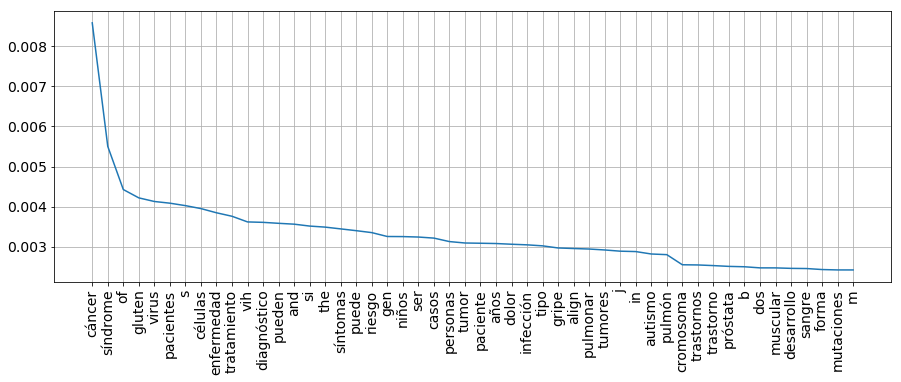

Cantidad de palabras: 35119


In [48]:
import copy
import operator
from collections import OrderedDict

idf_dict_enf2 = copy.copy(idf_dict_enfermedades)
for w in idf_dict_enf2.keys():
    idf_dict_enf2[w] = idf_dict_enf2.get(w) * most_common_words.freq(w)

idf_dict_enf2 = OrderedDict(sorted(idf_dict_enf2.items(), 
                                      key=operator.itemgetter(1), reverse=True))

keys = list(idf_dict_enf2.keys())
values = list(idf_dict_enf2.values())

plt.figure(figsize=(15, 5))
plt.plot(range(50), values[:50])
plt.xticks(range(50), keys[:50], rotation='vertical')
plt.grid()
plt.show()

print("Cantidad de palabras:", len(keys))

Aún tenemos demaciadas palabras para nuestro lexicón. Usualmente, para continuar la limpieza se requiere del uso de heurísticas, que son obtenidas tras observar generalidades del lenguaje y de la fuente utilizados.

In [55]:
uselessWords = 0
print("Palabra \tUtilidad")
for i in range(len(keys)):
    if(len(keys[i]) <= 2):
        uselessWords += 1
        if (uselessWords < 50):
            print(keys[i], "\t", values[i])
        
print("\nPalabras poco útiles:", uselessWords)

Palabra 	Utilidad
of 	 0.004426613081571354
s 	 0.004025695511928231
si 	 0.00351647598865137
j 	 0.002890663861448919
in 	 0.0028809388133838065
b 	 0.0025024189417169316
m 	 0.002423086978809821
et 	 0.002312671382169909
c 	 0.0022776288916752973
n 	 0.0022199384184070064
h 	 0.0022177672244121736
p 	 0.002132875837761143
t 	 0.002060212311757833
x 	 0.0019979351272608006
px 	 0.0018186021972179532
i 	 0.0016859068493719172
g 	 0.0016046922527217112
l 	 0.0015446358384957068
d 	 0.001516498544391316
r 	 0.0013955853231279794
q 	 0.0012880582396936693
mg 	 0.0012608492212698936
u 	 0.0012477393447590083
ii 	 0.0011900851819601247
to 	 0.001149529117537932
cd 	 0.0010930098576836032
f 	 0.0010899973480035362
dr 	 0.0010843265191900124
da 	 0.0010819999182536185
on 	 0.0010322722164005423
em 	 0.0010172398135602837
pp 	 0.0010013755147775373
am 	 0.00091650237535587
v 	 0.0009101660881937806
iv 	 0.0008757215459770438
k 	 0.0008613294832070129
ed 	 0.0008521742066399442
an 	 0.000787936

Las unicas palabras que puedo identificar que he visto son **pp** partes por millon y **mg** en miligramos, por ejemplo, $5\times 10^{-5}$

In [54]:
uselessWords = 0
for i in range(len(keys)):
    if(values[i] < 5e-5):
        uselessWords += 1
        if(uselessWords<30):
            print(keys[i], int(most_common_words.freq(keys[i])*most_common_words.N()))
        
print("\nPalabras poco útiles:", uselessWords)

anisákidos 4
paranoid 4
boxeo 4
hipogonadotrópico 4
paraseptal 4
dguok 4
acrodisostosis 4
hipnagógicas 4
rsv 4
pontiac 4
inauguración 4
debra 4
zip 4
fejerman 4
kal 4
insuflaciones 4
hoflund 4
neuroleptico 4
epidermodisplasia 4
apofisitis 4
laband 4
senescente 4
circadianos 4
bolena 4
foramina 4
tangshan 4
candidiásica 4
mamoplastia 4
difficulties 4

Palabras poco útiles: 18199


Observamos que estas palabras no son particularmente útiles para describir el tema de interés. Este sería un segundo criterio de eliminación. Con estas condiciones podemos restringir las palabras del lexicón:

In [56]:
new_keys = [item[0] for item in zip(keys, values) 
            if not ((item[1] < 0.001 and len(item[0]) <= 2) or item[1] < 5e-5)]

enfermedadesDf["palabras_principales"] = list(map(lambda row: [w for w in row if w in new_keys], 
                                  enfermedadesDf.palabras_comunes))

display(enfermedadesDf.head())
print("\nPalabras útiles:", len(new_keys))

nombre  \
0           Infantilismo   
1       Pectus excavatum   
2       Pectus carinatum   
3             Onfalocele   
4  Período prepatogénico   

                                                                                                                                             descripcion  \
0  archivo windelfetischistjpg miniaturadeimagen un con infantilismo al tener el fetichismo del pañal el infantilismo es una enfermedad en la que per...   
1  el pectus excavatum es una deformidad congénita de la caja torácica caracterizada por pecho hundido en la región del esternón la probabilidad del ...   
2  el pectus carinatum es una deformidad de la caja torácica en la que el pecho protruye en quilla ave quilla de barco es menos frecuente que el pect...   
3  la onfalocele u onfalocele infantil también llamado exonfalocele se da en el momento en el que el embrión presenta las vísceras de la región abdom...   
4  el período prepatogénico precede a las manifestaciones clínica s y está conformado por las condiciones del huésped el agente y el medio ambiente e...   

                                                                                                                                        palabras_comunes  \
0  [archivo, windelfetischistjpg, miniaturadeimagen, infantilismo, tener, fetichismo, pañal, infantilismo, enfermedad, persisten, adulto, diversas, c...   
1  [pectus, excavatum, deformidad, congénita, caja, torácica, caracterizada, pecho, hundido, región, esternón, probabilidad, pectus, excavatum, depen...   
2  [pectus, carinatum, deformidad, caja, torácica, pecho, protruye, quilla, ave, quilla, barco, menos, frecuente, pectus, excavatum, repercusiones, f...   
3  [onfalocele, u, onfalocele, infantil, llamado, exonfalocele, da, momento, embrión, presenta, vísceras, región, abdominal, cuerpo, aunque, casi, si...   
4  [período, prepatogénico, precede, manifestaciones, clínica, s, conformado, condiciones, huésped, agente, medio, ambiente, período, aparición, mani...   

                                                                                                                                    palabras_principales  
0  [archivo, miniaturadeimagen, infantilismo, tener, pañal, infantilismo, enfermedad, persisten, adulto, diversas, características, anatomía, anatómi...  
1  [pectus, excavatum, deformidad, congénita, caja, torácica, caracterizada, pecho, hundido, región, esternón, probabilidad, pectus, excavatum, depen...  
2  [pectus, carinatum, deformidad, caja, torácica, pecho, ave, menos, frecuente, pectus, excavatum, repercusiones, funcionales, menos, importantes, p...  
3  [onfalocele, u, onfalocele, infantil, llamado, da, momento, embrión, presenta, vísceras, región, abdominal, cuerpo, aunque, casi, siempre, saco, d...  
4  [período, precede, manifestaciones, clínica, s, condiciones, huésped, agente, medio, ambiente, período, aparición, manifieste, clínicamente, enfer...


Palabras útiles: 16597


In [58]:
#Guardar La base de datos para posteriores usos
new_enfDf = enfermedadesDf.drop('palabras_comunes', axis=1)
new_enfDf.to_json("datos/enfermedades_limpia.json", orient='records')


## Conclusiones

Ahora hemos limpiado un poco más nuestro lexicón (no al 100%) pero es algo. Ahora quedan las palabras mas importantes se podria decir aunque siempre van unas coladas que no nos interesan.